### 讀取需要的函式庫

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import clear_output
from wordcloud import WordCloud
from PIL import Image
import seaborn as sns
from func import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import plotly.offline as py
# from plotly.graph_objs import Scatter, Layout
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connecte)
import jieba
import sys
import re
import os
# re -> \d for number, \s for any space (\t\r\n...) 

### 定義 addstopword 及 adddict 函式

In [2]:
def addstopword(data):
    stop = []
    if os.path.isfile('./stay.txt'):
        with open('./stay.txt', 'rb') as f:
            text = f.read()
            encode = chardet.detect(text)
        stay = list(map(str.strip, open('./stay.txt', 'r+', encoding=encode['encoding']).readlines()))
    else:
        stay = []
    length = len(data)
    index = 0
    value = ''
    tmp = ''
    while(index != length):
        if data[index] not in stay:
            print(data[index])
            value = input('Add to stop word [y:stopword/n:stayword/q:quit]: ')
            if value == 'y':
                if tmp == 'p': stay.remove(data[index])
                stop.append(data[index])
            elif value == 'n':
                if tmp == 'p': stop.remove(data[index])
                stay.append(data[index])
            elif value == 'p':
                index -= 2
            elif value == 'q':
                break
            clear_output()
        tmp = value
        index += 1
    return stop, stay


def addword():
    word = []
    while(True):
        # clear_output()
        value = input('Add to dictionay word [q:quit]: ')
        if value == 'q':
            break
        else:
            word.append(value)
    return word

### 讀取資料夾中的資料

In [3]:
#path = '../../107-1PythonSampleCode/week_5/task_5/*.txt'
path = './保險業/*.txt'
title, data = readdir(path)


Number of files : 134


### 顯示部份資料內容

In [4]:
for i in range(len(data)):
    print('----Document : {0}----'.format(title[i]))
    print(data[i][:10], '...', data[i][-10:-1], sep='\n', end='\n\n')

----Document : 1052801_KAM----
							
關
...
								

----Document : 1052807_KAM----
						
關鍵
...
								

----Document : 1052809_KAM----
				
關鍵查核
...
								

----Document : 1052812_KAM----

關鍵查核事項		
...
								

----Document : 1052834_KAM----

關鍵查核事項		
...
								

----Document : 1052836_KAM----
						
關鍵
...
								

----Document : 1052837_KAM----
				
關鍵查核
...
								

----Document : 1052838_KAM----

關鍵查核事項		
...
								

----Document : 1052845_KAM----
				
關鍵查核
...
								

----Document : 1052849_KAM----
				
關鍵查核
...
								

----Document : 1052893_KAM----
				
關鍵查核
...
								

----Document : 1052895_KAM----
					
關鍵查
...
								

----Document : 1052897_KAM----
				
關鍵查核
...
								

----Document : 1055827_KAM----
		
關鍵查核事項
...
								

----Document : 1055830_KAM----
				
關鍵查核
...
								

----Document : 1055835_KAM----
	
關鍵查核事項	
...
								

----Document : 1055836_KAM----
							
關
...
								

----Document : 1055841_KAM----
				
強調事項
...
								

----Docume

### 新增詞彙至自定義詞庫，並匯入該詞庫
* savetofile(path, list_like_data)
* example for list_like_data:
  * [['來台']] : 完整 '來台' 字串被存入字典中
  * ['來台'] :　'來台' 視為獨立字元，存入 '來' '台' 於字典中 

In [5]:
# savetofile('./dict.txt', [['來台']])  # 完整字串　'來台'　被存入字典中
jieba.load_userdict('./dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.504 seconds.
Prefix dict has been built succesfully.


### 新增詞彙至自定義停止詞彙中

In [6]:
stopwords = ['一','二','三','四','五','六','用','淨','利','值','前','據','談','自','至','曾','出',
            '合','最','供','而','個','很','得','達','家','進','所','夏','若','邱','但','中','可',
            '他','我','列','將','對','之','率','已','由','佔','本','日','月','年','另','故','於',
            '較','請','再','經','也','在','依','到','等','或','大','認列','不僅','讓','相關','最終',
            '把','沒','及','過去','認為','為','按','比','仍','係','後','及與','以','時','該','的',
            '並','更','就','註','有','事','來','不','從','堺','權','從','卻','說','要','今','度',
            '手','才','又','其','長','了','百','億','元','例如','可能','由於','因此','土城','一份',
            '上午','這份','多','赴','和','與','是','約','就是','只是','但是','如果','附註','部分',
            '事項','各位','品牌','集團','幅度','資產','新','台幣','日圓','億日圓','機構','面板','日元',
            '企業','報導','媒體','目前','提案','經營','實地','大阪','億元','以及','代工','一步','第二',
            '雙方','方案','分析','接受','成為','事業','目前','高橋','董事','營業','受到','提供','使用',
            '本年','說明','現金','成本','營業外','收入','結轉','分攤','其他','影響財務','詳合','結果',
            '不是','是否','最高','記者','超過','兩家','主幹','我們','除了','自己','立刻','','日本',
            '之間','不過','今天','然而','此外','工廠','預測','如下','之一','附註','附','註','其中',
            '因為','查核','報告增加','會計','相對','仟元','金額','權益','能力利益','股東','合理性',
            '假設','無形','上','開關鍵','模型','支出','控制','計算','資金評估','報告','因應','仟元',
            '金額','權益','假設','無形','上','模型','支出','控制','計算資金','評估','人次','重大',
            '資訊','總額','民國','估計','一副','公司','年度','包括','正確性','正','確性','減損','共為',
            '預估','預算','去年同期','應該','雖然','下午','要求','一樣','一家','維持','公開','整體',
            '表示','特性','市場','科目','發生','年本','重要','判斷','主要','流量','意見','關鍵','同期',
            '評價','正確','地區','總資產','執行','程序','測試','稅後淨利','股份有限公司','蘋果','鴻海',
            '夏普','郭台銘','鴻夏戀','iPhone','1','2','3','4','5','6','7','8','9','0','NT','2012',
            '10','三星','供應商','INCJ','案','LG','會','下','買','電子','清單','向','都','郭董',
            '能力','進','廠','內','購','併','這','看','人','被','能','外界','指出','五日','不同','陷入',
            '出現','一年','什麼','安倍','這個','可以','一個','同時','去年','部門','二月','這是','月底',
            '完成','財務','今年','階段','子公司','條件','引述','召開','擁有','有助','持有','進入','旗下',
            '已經','入座','罩','業務','顯示','尺寸','萬張','取得','高達','持續','進行','人士','提出',
            '社長','加工','內容','總部','沒有','加上','決定','群創','最大','四年','代廠','做','鴻','高',
            '市','不會','傳出','文件','客戶超過','SDP','JDI','IGZO','Display','WitsView','NHK',
            '12','7000','3500','2015','2016','25','30','000','29']
puncs_Full = '！？｡＂＃＄％＆＇（）()＊＋，－／：；＜＝＞＠［＼］$＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'
puncs_Half = "!?.#$%&'()*+,-/:;<=>@[]^_{}|~\\\""
savetofile('./stopword.txt', [stopwords, puncs_Full, puncs_Half])

In [7]:
stopword = readdir('./stopword.txt')[1][0].split('\n')
stopword.append('\n')
stopword[0:10]


Number of files : 1


['一', '二', '三', '四', '五', '六', '用', '淨', '利', '值']

### 利用 jieba 對文件進行斷字，並統計字詞頻率，顯示前十名資料

In [8]:
wordDictionary = []
for i in range(len(data)):
    seg_list = jieba.cut(data[i], cut_all=False)
    seg_list = list(seg_list)
    data_list = list()
    wordDict = {}
    for w in seg_list:
        if (w not in stopword) and (w not in puncs_Full) and (w not in puncs_Half):
            data_list.append(w)
            if w in wordDict:
                wordDict[w] = wordDict[w] + 1
            else:
                wordDict[w] = 1
    wordDictionary.append(wordDict)
    print('Number of word in document ({0}) : '.format(title[i]), len(wordDict))
    sort = sorted(wordDict.items(), key=lambda x: x[1], reverse = True)
    print(sort[0:10])
    data[i] = ' '.join(data_list)

Number of word in document (1052801_KAM) :  133
[('\t', 231), ('\r\n', 29), ('放款', 8), ('彰化銀行', 7), ('放款利息收入', 6), ('105', 5), ('關鍵查核事項', 5), ('應收款', 4), ('利息收入', 3), ('瞭解', 3)]
Number of word in document (1052807_KAM) :  301
[('\t', 726), ('\r\n', 91), ('風險', 22), ('所得', 12), ('遞延', 10), ('放款', 9), ('衡量', 8), ('稅', 8), ('關鍵查核事項', 8), ('等級', 7)]
Number of word in document (1052809_KAM) :  152
[('\t', 284), ('\r\n', 36), ('銀行', 7), ('及其', 6), ('放款', 6), ('商業', 5), ('提列', 5), ('京城', 5), ('備抵呆帳', 4), ('管理階層', 4)]
Number of word in document (1052812_KAM) :  164
[('\t', 397), ('\r\n', 50), ('商業', 13), ('及其', 13), ('銀行', 13), ('系統', 10), ('放款', 10), ('貼現', 9), ('台中', 8), ('授信', 7)]
Number of word in document (1052834_KAM) :  167
[('\t', 400), ('\r\n', 51), ('放款', 16), ('福利', 10), ('合併', 8), ('組合', 8), ('負債', 8), ('臺', 7), ('管理階層', 7), ('中小', 7)]
Number of word in document (1052836_KAM) :  137
[('\t', 270), ('\r\n', 34), ('金融', 7), ('放款', 7), ('合併', 6), ('及其', 6), ('高雄', 5), ('105', 5), ('銀行'

Number of word in document (105保險新產) :  99
[('\r\n', 32), ('保險', 10), ('精算', 9), ('金', 7), ('負債', 7), ('準備', 7), ('價值', 6), ('公允', 6), ('複', 5), ('金融工具', 5)]
Number of word in document (105保險旺旺保) :  160
[('\u3000', 100), ('\r\n', 51), ('保險', 22), ('負債', 21), ('合併', 12), ('關鍵查核事項', 9), ('及其', 8), ('友聯產物', 8), ('旺旺', 8), ('投資', 7)]
Number of word in document (105保險泰安產險) :  112
[('\r\n', 33), ('\u3000', 12), ('產物', 9), ('泰安', 9), ('保險', 9), ('賠款', 7), ('保費', 6), ('準備', 6), ('105', 5), ('關鍵查核事項', 5)]
Number of word in document (105保險第一保) :  86
[('\r\n', 21), ('\u3000', 10), ('賠款', 8), ('準備', 8), ('未報', 4), ('產物', 4), ('精算', 4), ('未決', 4), ('第一', 4), ('保險', 4)]
Number of word in document (105保險遠壽) :  210
[('\r\n', 57), ('保險', 22), ('準備', 16), ('負債', 14), ('價值', 10), ('遠雄', 9), ('人壽', 9), ('請詳', 8), ('有關', 8), ('公允', 8)]
Number of word in document (105證券元大證) :  111
[('\r\n', 43), ('櫃', 6), ('合併', 6), ('公允', 6), ('未上市', 6), ('衡量', 6), ('價值', 5), ('採用', 4), ('請詳', 4), ('關鍵查核事項', 4)]
Number of 

Number of word in document (1065875_KAM) :  184
[('\r\n', 48), ('放款', 14), ('台灣', 9), ('銀行', 9), ('商業', 8), ('現及', 8), ('星展', 7), ('交易', 6), ('減損評估', 6), ('管理階層', 6)]
Number of word in document (1065876_KAM) :  151
[('\r\n', 40), ('所得', 8), ('106', 8), ('放款', 8), ('管理階層', 7), ('合併', 7), ('關鍵查核事項', 7), ('遞延', 6), ('商業', 5), ('上海', 5)]
Number of word in document (1065879_KAM) :  198
[('\r\n', 59), ('放款', 14), ('銀行', 12), ('澳盛', 11), ('台灣', 11), ('商業', 10), ('衍生', 9), ('關鍵查核事項', 9), ('請詳', 8), ('應收款', 8)]
Number of word in document (106保險三商壽) :  195
[('\r\n', 46), ('\t', 46), ('保險', 15), ('金融', 12), ('負債', 12), ('準備', 11), ('價值', 9), ('提存', 7), ('公允', 7), ('請詳', 7)]
Number of word in document (106保險中再保) :  199
[('\r\n', 66), ('\t', 65), ('準備', 14), ('賠款', 13), ('管理階層', 11), ('保費', 11), ('投資', 9), ('請詳', 8), ('保險', 8), ('證據', 6)]
Number of word in document (106保險中壽) :  150
[('\r\n', 41), ('保險', 19), ('負債', 14), ('人壽', 11), ('中國', 11), ('金融', 7), ('價值', 6), ('採用', 5), ('關鍵查核事項', 5), ('內部', 

### 顯示各文件低於閥值 (limit) 的字詞

In [9]:
limit = 0
wordsperdocument = 50
for i in range(len(data)):
    count = 0
    print('----Document : {0}----'.format(title[i]))
    for ind, value in wordDictionary[0].items():
        if (value <= limit) & (count != wordsperdocument):
            count += 1
            print(ind, end = ', ')
    print()

----Document : 1052801_KAM----

----Document : 1052807_KAM----

----Document : 1052809_KAM----

----Document : 1052812_KAM----

----Document : 1052834_KAM----

----Document : 1052836_KAM----

----Document : 1052837_KAM----

----Document : 1052838_KAM----

----Document : 1052845_KAM----

----Document : 1052849_KAM----

----Document : 1052893_KAM----

----Document : 1052895_KAM----

----Document : 1052897_KAM----

----Document : 1055827_KAM----

----Document : 1055830_KAM----

----Document : 1055835_KAM----

----Document : 1055836_KAM----

----Document : 1055841_KAM----

----Document : 1055843_KAM----

----Document : 1055844_KAM----

----Document : 1055847_KAM----

----Document : 1055848_KAM----

----Document : 1055849_KAM----

----Document : 1055850_KAM----

----Document : 1055852_KAM----

----Document : 1055854_KAM----

----Document : 1055857_KAM----

----Document : 1055858_KAM----

----Document : 1055862_KAM----

----Document : 1055863_KAM----

----Document : 1055870_KAM----

----Docu

### 利用 wordDictionary 移除出現次數低於閥值 (limit) 的字詞，並顯示部份結果

In [10]:
for i in range(len(data)):
    for key, value in wordDictionary[0].items():
        if value <= limit:
            data[i] = data[i].replace(key, '')
    print('document :', title[i])
    print(data[i][:50], '...', data[i][-50:-1], sep='', end='\n\n')

document : 1052801_KAM
	 	 	 	 	 	 	 
 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 ...	 	 	 	 	 
 減損發生率 帳款回收率 參數 一致性 	 	 	 	 	 	 	 	 

document : 1052807_KAM
	 	 	 	 	 	 
 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 ...	 
 覆核 關係人交易 明細 確認 關係人交易 完整 揭露 	 	 	 	 	 	 	 	 

document : 1052809_KAM
	 	 	 	 
 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 依本會 ...參閱 合併 財 	 	 	 	 	 	 	 	 
 務 五及 	 	 	 	 	 	 	 	 

document : 1052812_KAM

 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 依本會 專業 對台 商業...	 	 	 	 	 	 	 
 出具 保留 在案 備供 參考 	 	 	 	 	 	 	 	 

document : 1052834_KAM

 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 依本會 專業 臺 灣 中...	 	 	 	 	 	 
 告 出具 保留 在案 備供 參考 	 	 	 	 	 	 	 	 

document : 1052836_KAM
	 	 	 	 	 	 
 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 ...	 	 	 	 	 	 	 
 出具 保留 在案 備供 參考 	 	 	 	 	 	 	 	 

document : 1052837_KAM
	 	 	 	 
 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 依本會 ...	 
 分別 出具 保留 及修 正式 保留 在案 備供 參考 	 	 	 	 	 	 	 	 

document : 1052838_KAM

 關鍵查核事項 	 	 	 	 	 	 	 	 
 關鍵查核事項 指 依本會 專業 聯邦 銀行...	 	 	 	 	 	 	 
 出具 保留 在案 備供 參考 	 	 	 	 	 	 	 	 

document : 10528

 限 ... 商業 銀行 業已 編 製 106 105 之個 體財 
 務 出具 保留 在案 備供 參考 

document : 1062895_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 對陽信 商業 銀行 股份有限 公 
 司...5 之個體 報 
 表 分別 出具 保留 加 段 保留 報 
 告 在案 備供 參考 
 

document : 1062897_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 王道 商業 銀行 股份有限 公 
 司 ... 商業 銀行 業已 編 製 106 105 之個體 報 
 表 出具 保留 在案 備供 參考 

document : 1065827_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 對華泰 商業 銀行 及子公 
 司 10...
 華泰商業 銀行 編 製 106 105 個體 並經本 
 出具 保留 在案 備供 參考 

document : 1065830_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 對三信 ○ 合併 
 最為 合併 形成 ...適當 
 
 三信 商業 銀行 編 製 ○ ○ 之個體 
 出具 保留 在案 備供 參考 

document : 1065835_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 對國 泰世華 商業 銀行 
 ○ 合併 ... 商譽 減損評估 管理階層 
 方法 
 國泰世華 商業 銀行 及其 關於商譽 揭露 
 

document : 1065836_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 台北富邦商業銀行 股份 
 限 106 ...富邦商業銀行 業已 編 製 106 105 之個 體財 
 務 出具 保留 在案 備供 參考 

document : 1065838_KAM

 關鍵查核事項 
 關鍵查核事項 指 依本會 專業 對華南 商業 銀行 股份有限 公 
 司... 商業 銀行 業已 編 製 106 105 之個體 報 
 表 出具 保留 在案 備供 參考 

document : 1065841_KAM

 強調 
 有關 合併 九 所述 案件 尚 司法機關 調查 審理 尚未 確 
 定 
 未... 信 託 商業 銀行 編 製 ○ 六年 ○ 之個體 

### 移除所有標點符號、非中文英文數字之資料

In [11]:
for i in range(len(data)):
    data[i] = re.sub('[^\u4e00-\u9fff ]', '', data[i])
#[^\u4e00-\u9fff A-Za-z0-9]

### 印出部份斷字結果

In [12]:
for i in range(len(data)):
    print('document :', title[i])
    print(data[i][:20], ' ... ', data[i][-20:-1], sep='', end='\n\n')

document : 1052801_KAM
        關鍵查核事項       ... 款回收率 參數 一致性        

document : 1052807_KAM
       關鍵查核事項        ... 關係人交易 完整 揭露        

document : 1052809_KAM
     關鍵查核事項          ...        務 五及        

document : 1052812_KAM
 關鍵查核事項          關鍵查 ... 保留 在案 備供 參考        

document : 1052834_KAM
 關鍵查核事項          關鍵查 ... 保留 在案 備供 參考        

document : 1052836_KAM
       關鍵查核事項        ... 保留 在案 備供 參考        

document : 1052837_KAM
     關鍵查核事項          ... 保留 在案 備供 參考        

document : 1052838_KAM
 關鍵查核事項          關鍵查 ... 保留 在案 備供 參考        

document : 1052845_KAM
     關鍵查核事項          ... 保留 在案 備供 參考        

document : 1052849_KAM
     關鍵查核事項          ...  自始 合併 並重編         

document : 1052893_KAM
     關鍵查核事項          ... 保留 在案 備供 參考        

document : 1052895_KAM
      關鍵查核事項         ... 保留 在案 備供 參考        

document : 1052897_KAM
     關鍵查核事項          ... 保留 在案 備供 參考        

document : 1055827_KAM
   關鍵查核事項          關 ... 保留 在案 備供 參考        

document : 1055830_KAM
     關鍵查核事項

### 初始化 TFIDF 物件，用以計算 tfidf

In [13]:
tfidf_vectorizer = TfidfVectorizer(max_df = 1, min_df = 0, analyzer = 'word', max_features = 10000)
#tfidf_vectorizer = CountVectorizer(stop_words = stopword)

### 計算 TFIDF 詞頻矩陣

In [14]:
tfidf_matrix = tfidf_vectorizer.fit_transform(data)
tfidf_matrix

<134x648 sparse matrix of type '<class 'numpy.float64'>'
	with 648 stored elements in Compressed Sparse Row format>

### 顯示 TFIDF 詞頻矩陣大小

In [15]:
tfidf_matrix.shape

(134, 648)

### 顯示部份 TFIDF 詞頻矩陣中的字詞

In [16]:
words = tfidf_vectorizer.get_feature_names()
print(words[0:50])

['一月份', '一期', '一證券', '一類', '七日', '三七', '三商', '三商美', '三月', '上之關', '下個', '下針', '不動產及', '不動產帳', '並仰', '並依產業', '並同', '並委', '並檢查', '並比', '並決', '並測', '並經會', '並評', '中之部', '中較', '之二', '之依', '之備', '之價格', '之公', '之可觀', '之國內', '之國際', '之壓', '之多項', '之契約', '之子行', '之客', '之戶', '之手', '之折現', '之押值', '之放', '之核', '之無形', '之營', '之範圍', '之經驗', '之股']


In [17]:
data = pd.DataFrame(tfidf_matrix.toarray().T, index = words, columns = title)
data.head()

,1052801_KAM,1052807_KAM,1052809_KAM,1052812_KAM,1052834_KAM,1052836_KAM,1052837_KAM,1052838_KAM,1052845_KAM,1052849_KAM,...,106證券元大證,106證券大展證,106證券大慶證,106證券宏遠證,106證券康和證,106證券權益期,106證券福邦證,106證券統一證,106證券群益證,106證券致和證
一月份,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
一期,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
一證券,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
一類,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
七日,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 顯示 TFIDF > 閥值 (limit) 的資料

### 繪製文章間相關性圖

In [18]:
if len(title) > 20:
    print('檔案數量超過 20, 不繪製相關性圖')
else:
    f, ax = plt.subplots(figsize=(15,15))
    plt.title('Correlation of Documents', fontsize = 13)
    sns.heatmap(data.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
               cmap="YlGnBu", linecolor='black', annot=True)

檔案數量超過 20, 不繪製相關性圖


### 將詞頻矩陣標準化

In [19]:
data_std = StandardScaler().fit_transform(data.values.T)
data_std

array([[-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711],
       [-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711],
       [-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711],
       ...,
       [-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711],
       [-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711],
       [-0.086711, -0.086711, -0.086711, ..., -0.086711, -0.086711,
        -0.086711]])

### 將標準化後的詞頻矩陣降至 7 維

In [20]:
pca_7 = PCA(n_components=7)
x_7d = pca_7.fit_transform(data_std)
x_7d

array([[-5.48398620e-01,  4.05107185e-02, -5.09348068e-01,
        -1.04962489e-01, -7.26001748e-01, -1.61159674e-01,
        -4.87308695e-01],
       [-6.49264325e-01, -4.86731250e-01, -8.73705914e-01,
        -1.22064366e-01, -1.35494934e+00,  1.82979796e+00,
         1.94475039e+00],
       [-4.01208854e-01, -1.30459687e-03, -3.17254033e-01,
        -6.00356224e-03, -4.28936521e-01, -2.41517959e-01,
        -2.48641305e-01],
       [-3.88193482e-01, -1.24307823e-03, -3.01308936e-01,
        -5.60125803e-03, -4.06041797e-01, -2.27458352e-01,
        -2.32997887e-01],
       [-3.88193482e-01, -1.24307823e-03, -3.01308936e-01,
        -5.60125803e-03, -4.06041797e-01, -2.27458352e-01,
        -2.32997887e-01],
       [-4.30042227e-01, -1.44097713e-03, -3.54758381e-01,
        -7.03574146e-03, -4.83482911e-01, -2.75535810e-01,
        -2.87401172e-01],
       [-4.63304409e-01, -1.81386405e-03, -4.01703119e-01,
        -9.43806379e-03, -5.53272213e-01, -3.17609889e-01,
        -3.3833926

### 利用 KMeans 將 7 維數據分成 3 組

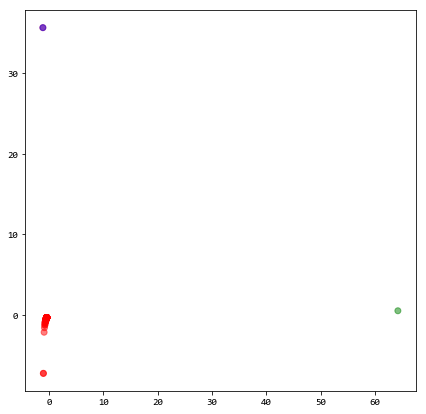

In [21]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_7d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_7d[:,0],x_7d[:,2], c= label_color, alpha=0.5) 
plt.show()

### 顯示各組別文件名稱

In [22]:
cluster = dict()
for ind, val in enumerate(X_clustered):
    cluster.setdefault(val, []).append(ind)
for group, ls in cluster.items():
    print('Group ', group, '( color:', LABEL_COLOR_MAP[group], '):')
    for file in ls.__iter__():
        print('\t', title[file])

Group  0 ( color: r ):
	 1052801_KAM
	 1052807_KAM
	 1052809_KAM
	 1052812_KAM
	 1052834_KAM
	 1052836_KAM
	 1052837_KAM
	 1052838_KAM
	 1052845_KAM
	 1052849_KAM
	 1052893_KAM
	 1052895_KAM
	 1052897_KAM
	 1055827_KAM
	 1055830_KAM
	 1055835_KAM
	 1055836_KAM
	 1055841_KAM
	 1055843_KAM
	 1055844_KAM
	 1055847_KAM
	 1055848_KAM
	 1055849_KAM
	 1055850_KAM
	 1055852_KAM
	 1055854_KAM
	 1055857_KAM
	 1055858_KAM
	 1055862_KAM
	 1055863_KAM
	 1055870_KAM
	 1055872_KAM
	 1055875_KAM
	 1055876_KAM
	 1055879_KAM
	 105保險中再保
	 105保險中壽
	 105保險兆豐保險
	 105保險全球人壽
	 105保險南山人壽
	 105保險台壽
	 105保險台產
	 105保險台銀人壽
	 105保險國壽
	 105保險國泰產險
	 105保險宏泰人壽
	 105保險富邦人壽
	 105保險富邦保
	 105保險新壽
	 105保險新產
	 105保險旺旺保
	 105保險泰安產險
	 105保險第一保
	 105保險遠壽
	 105證券元大證
	 105證券大展證
	 105證券大慶證
	 105證券宏遠證
	 105證券康和證
	 105證券權益期
	 105證券福邦證
	 105證券統一證
	 105證券群益證
	 105證券致和證
	 1062801_KAM
	 1062807_KAM
	 1062809_KAM
	 1062812_KAM
	 1062834_KAM
	 1062836_KAM
	 1062838_KAM
	 1062845_KAM
	 1062849_KAM
	 1062893_KAM
	 1062895_KAM
	 1062897_KAM

### 將標準化後的詞頻矩陣降至 4 維

In [23]:
pca_4 = PCA(n_components=4)
x_4d = pca_4.fit_transform(data_std)
x_4d

array([[-5.51472103e-01, -9.76538317e-03, -6.14617022e-01,
         3.39250968e-02],
       [-6.67756394e-01, -2.12443573e-02, -1.01989274e+00,
        -8.54429625e-01],
       [-4.01561850e-01, -6.96130873e-03, -3.36482357e-01,
         7.25613823e-03],
       [-3.88517264e-01, -6.34408330e-03, -3.19100875e-01,
         6.53984783e-03],
       [-3.88517264e-01, -6.34408330e-03, -3.19100875e-01,
         6.53984783e-03],
       [-4.30471353e-01, -8.61760589e-03, -3.77677470e-01,
         9.21002442e-03],
       [-4.63951893e-01, -1.18622166e-02, -4.30512396e-01,
         1.34443259e-02],
       [-4.15514071e-01, -7.70833773e-03, -3.55886016e-01,
         8.13314305e-03],
       [-4.30472491e-01, -8.64505810e-03, -3.77689794e-01,
         9.21657150e-03],
       [-4.15514124e-01, -7.70902889e-03, -3.55887352e-01,
         8.13248561e-03],
       [-4.46551113e-01, -9.79743868e-03, -4.02246803e-01,
         1.07955362e-02],
       [-4.30472541e-01, -8.64220033e-03, -3.77700483e-01,
      

### 利用 KMeans 將 4 維數據分成 3 組

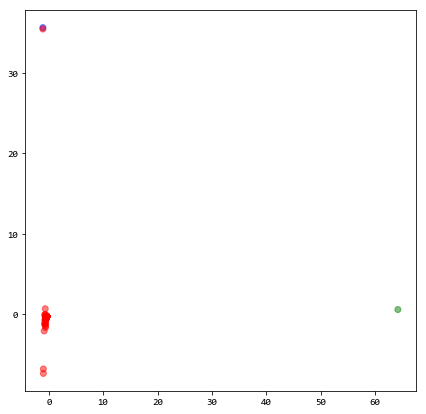

In [24]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_4d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_4d[:,0],x_4d[:,2], c= label_color, alpha=0.5)
plt.show()

### 顯示各組別文件名稱

In [25]:
cluster = dict()
for ind, val in enumerate(X_clustered):
    cluster.setdefault(val, []).append(ind)
for group, ls in cluster.items():
    print('Group ', group, '( color:', LABEL_COLOR_MAP[group], '):')
    for file in ls.__iter__():
        print('\t', title[file])

Group  0 ( color: r ):
	 1052801_KAM
	 1052807_KAM
	 1052809_KAM
	 1052812_KAM
	 1052834_KAM
	 1052836_KAM
	 1052837_KAM
	 1052838_KAM
	 1052845_KAM
	 1052849_KAM
	 1052893_KAM
	 1052895_KAM
	 1052897_KAM
	 1055827_KAM
	 1055830_KAM
	 1055835_KAM
	 1055836_KAM
	 1055841_KAM
	 1055843_KAM
	 1055844_KAM
	 1055847_KAM
	 1055848_KAM
	 1055849_KAM
	 1055850_KAM
	 1055852_KAM
	 1055854_KAM
	 1055857_KAM
	 1055858_KAM
	 1055862_KAM
	 1055863_KAM
	 1055870_KAM
	 1055872_KAM
	 1055875_KAM
	 1055876_KAM
	 1055879_KAM
	 105保險中再保
	 105保險中壽
	 105保險兆豐保險
	 105保險全球人壽
	 105保險南山人壽
	 105保險台壽
	 105保險台產
	 105保險台銀人壽
	 105保險國壽
	 105保險國泰產險
	 105保險宏泰人壽
	 105保險富邦人壽
	 105保險富邦保
	 105保險新壽
	 105保險新產
	 105保險旺旺保
	 105保險泰安產險
	 105保險第一保
	 105保險遠壽
	 105證券元大證
	 105證券大展證
	 105證券大慶證
	 105證券宏遠證
	 105證券康和證
	 105證券權益期
	 105證券福邦證
	 105證券統一證
	 105證券群益證
	 105證券致和證
	 1062801_KAM
	 1062807_KAM
	 1062809_KAM
	 1062812_KAM
	 1062834_KAM
	 1062836_KAM
	 1062838_KAM
	 1062845_KAM
	 1062849_KAM
	 1062893_KAM
	 1062895_KAM
	 1062897_KAM

### 將標準化的詞頻矩陣降至 2 維

In [26]:
pca_2 = PCA(n_components = 2)
x_2d = pca_2.fit_transform(data_std)
x_2d

array([[-5.44811213e-01,  4.71378437e-03],
       [-6.68776012e-01,  3.60863234e-01],
       [-4.00974450e-01, -1.78617459e-02],
       [-3.87975652e-01, -1.70036975e-02],
       [-3.87975652e-01, -1.70036975e-02],
       [-4.29767307e-01, -1.98695306e-02],
       [-4.63008439e-01, -2.21549948e-02],
       [-4.14872853e-01, -1.88110699e-02],
       [-4.29767303e-01, -1.98609142e-02],
       [-4.14872829e-01, -1.88110952e-02],
       [-4.45764808e-01, -2.10521513e-02],
       [-4.29767064e-01, -1.98700203e-02],
       [-5.45903335e-01, -6.89436428e-02],
       [-4.00974451e-01, -1.78617464e-02],
       [-5.78354316e-01,  3.06459700e-02],
       [-6.06432675e-01,  1.74379260e-01],
       [-3.87975652e-01, -1.70036975e-02],
       [-4.00974451e-01, -1.78617451e-02],
       [-6.62787320e-01, -8.43062607e-01],
       [-7.22021912e-01, -1.07759215e-01],
       [-4.00974451e-01, -1.78617449e-02],
       [-8.12294830e-01, -5.31108958e-02],
       [-3.87975652e-01, -1.70036975e-02],
       [-3.

### 利用 KMeans 將 2 維數據分成 3 組

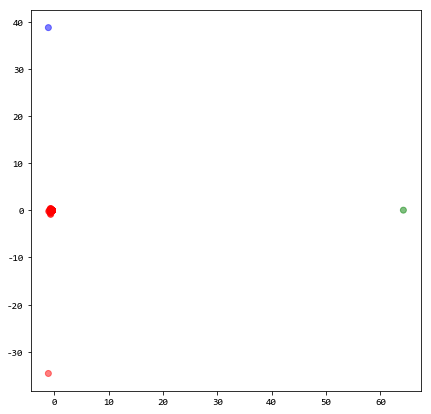

In [27]:
#Set a 3 KMeans clustering
kmeans = KMeans(n_clusters = 3)

#Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(x_2d)

#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(x_2d[:,0],x_2d[:,1], c= label_color, alpha=0.5)
plt.show()

In [30]:
LABEL_COLOR_MAP11 = {0:'red', 1: 'green', 2: 'blue'}
label_color11 = [LABEL_COLOR_MAP11[l] for l in X_clustered]
trace1=go.Scatter(
    x=x_2d[:,0].tolist(),
    y=x_2d[:,1].tolist(),
    mode = 'markers',
    marker = dict(color = label_color11, size = [15] * len(label_color), opacity = [0.5] * len(label_color)),
    hoverinfo = 'text',
    text = title
)
py.iplot([trace1])